<a href="https://colab.research.google.com/github/CopypastCore/IAD/blob/main/determination_of_profit%26loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дан многомерный табличный размеченный набор данных. Необходимо
выполнить классификационный анализ данных по указанному целевому признаку на
основе полносвязной нейросетевой модели и нейросетевой модели, указанной в
варианте, в соответствии со следующей последовательностью этапов.

Набор данных cхемы пирамиды – определение прибыли или убытка. Схемы
пирамид, запущенные в разных странах, часто соблазняют простых людей
делать деньги в краткосрочной перспективе. Построить регрессионную модель
прогностической оценки схемы пирамиды для целевого признака «profit»
(выгода от схемы) от остальных входных признаков.  
a.   Пункт 5 – простая рекуррентная сеть
b.   Пункт 3.h – Нормализация

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')

In [ ]:
!pip install tensorflow
!pip install scikeras

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/V8.csv')
df = dataset.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, errors='ignore')
print(df.head())

   cost_price  profit_markup  depth_of_tree  sales_commission  profit
0      3500.0              2             21              1000  -16500
1      3500.0              2             26              1000  -21500
2         NaN              2             23              1000  -18500
3         NaN              3             12              1000   -4000
4      3500.0              2             12              1000   -7500


In [3]:
print("Размер датасета:", df.shape)
print("\nИнформация о данных:")
print(df.info())
print("\nОсновные статистики:")
print(df.describe().T)
print("\nПроверка на пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (500, 5)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cost_price        244 non-null    float64
 1   profit_markup     500 non-null    int64  
 2   depth_of_tree     500 non-null    int64  
 3   sales_commission  500 non-null    int64  
 4   profit            500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB
None

Основные статистики:
                  count      mean          std      min      25%     50%  \
cost_price        244.0  3500.000     0.000000   3500.0   3500.0  3500.0   
profit_markup     500.0     3.498     1.126292      2.0      3.0     3.0   
depth_of_tree     500.0    15.896     8.095694      2.0      9.0    16.0   
sales_commission  500.0  1000.000     0.000000   1000.0   1000.0  1000.0   
profit            500.0 -6153.000  9080.528784 -25500.0 -1250

In [4]:
# Проверка дубликатов
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates}")

Количество полных дубликатов: 289


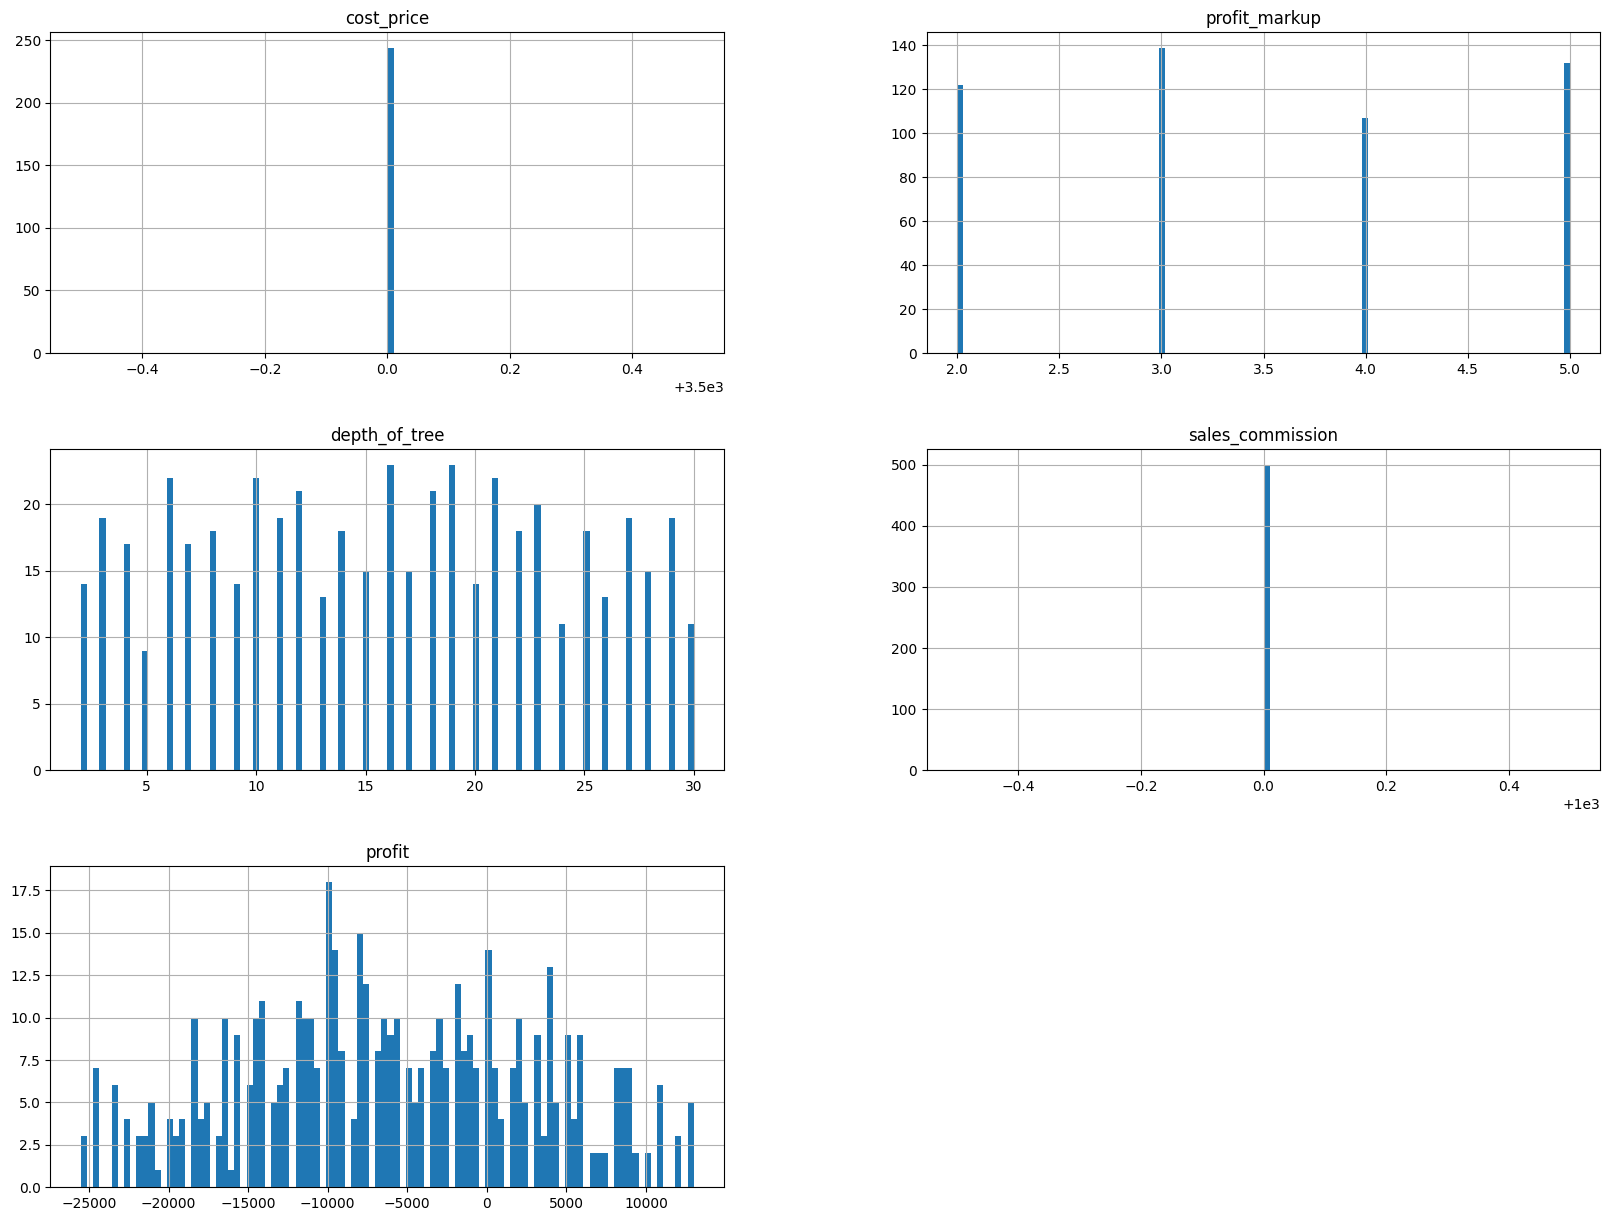


Матрица диаграмм рассеяния:


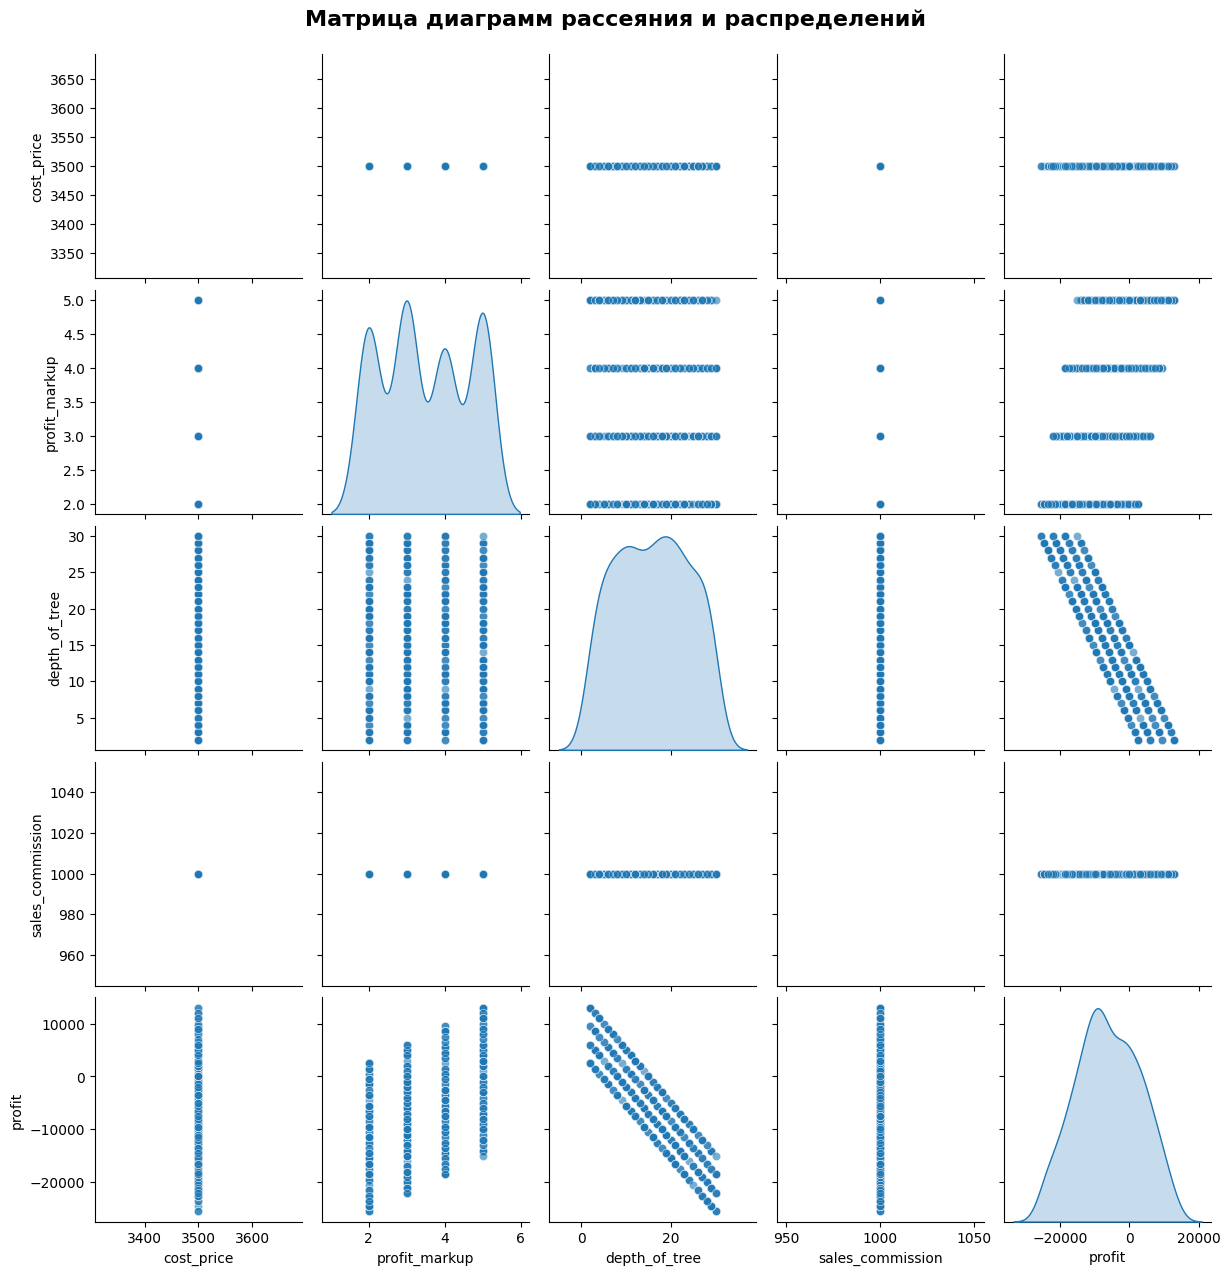

In [5]:
%matplotlib inline
df.hist(bins=100, figsize=(20,15))
plt.show()

# Матрица диаграмм рассеяния
print("\nМатрица диаграмм рассеяния:")
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Матрица диаграмм рассеяния и распределений', y=1.02, fontsize=16, fontweight='bold')
plt.show()

In [6]:
print(f"Количество строк до очистки: {len(df)}")

# Заполнение пропущенных значений в cost_price медианным значением
df['cost_price'] = df['cost_price'].fillna(df['cost_price'].median())
print("Пропущенные значения после обработки:")
print(df.isnull().sum())
df

Количество строк до очистки: 500
Пропущенные значения после обработки:
cost_price          0
profit_markup       0
depth_of_tree       0
sales_commission    0
profit              0
dtype: int64


,cost_price,profit_markup,depth_of_tree,sales_commission,profit
0,3500.0,2,21,1000,-16500
1,3500.0,2,26,1000,-21500
2,3500.0,2,23,1000,-18500
3,3500.0,3,12,1000,-4000
4,3500.0,2,12,1000,-7500
...,...,...,...,...,...
495,3500.0,5,12,1000,3000
496,3500.0,3,8,1000,0
497,3500.0,2,10,1000,-5500
498,3500.0,4,21,1000,-9500


Корреляционная матрица:
                  cost_price  profit_markup  depth_of_tree  sales_commission  \
cost_price               NaN            NaN            NaN               NaN   
profit_markup            NaN       1.000000      -0.021562               NaN   
depth_of_tree            NaN      -0.021562       1.000000               NaN   
sales_commission         NaN            NaN            NaN               NaN   
profit                   NaN       0.453341      -0.900905               NaN   

                    profit  
cost_price             NaN  
profit_markup     0.453341  
depth_of_tree    -0.900905  
sales_commission       NaN  
profit            1.000000  


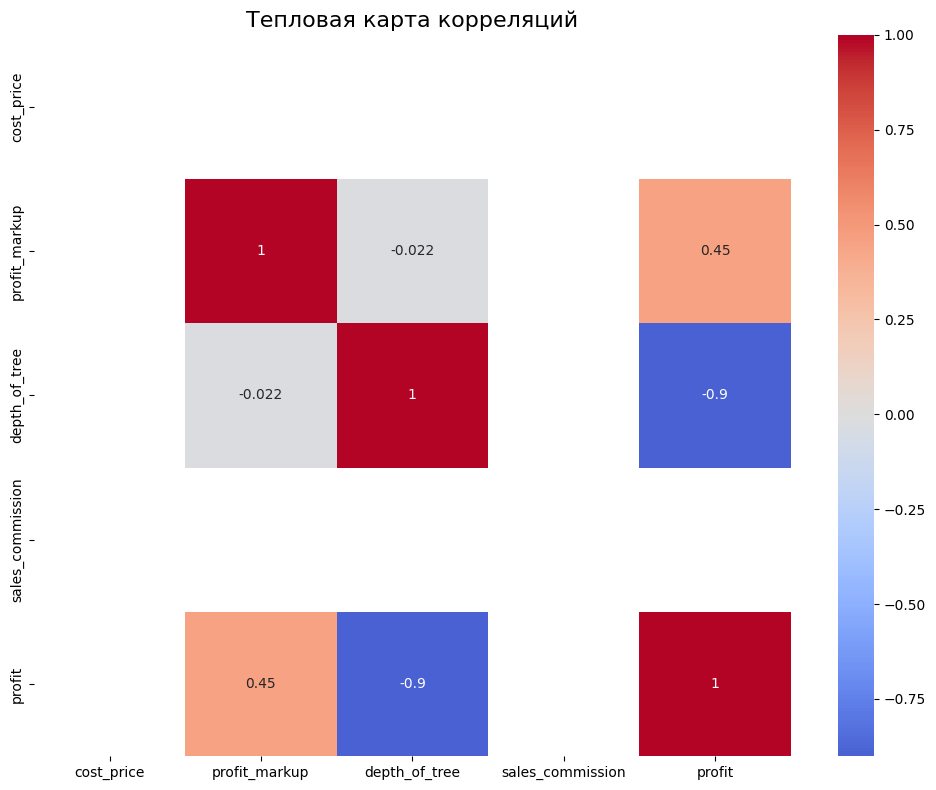

In [7]:
corr_matrix = df.corr()
print("Корреляционная матрица:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Тепловая карта корреляций', fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
# Создание новых признаков
df['total_cost'] = df['cost_price'] + df['sales_commission']
df['profit_per_depth'] = df['profit'] / (df['depth_of_tree'] + 1)
df['markup_depth_interaction'] = df['profit_markup'] * df['depth_of_tree']
df['cost_markup_ratio'] = df['cost_price'] / (df['profit_markup'] + 1)

print("Добавлены новые признаки: total_cost, profit_per_depth, markup_depth_interaction, cost_markup_ratio")
print(df[['total_cost', 'profit_per_depth', 'markup_depth_interaction', 'cost_markup_ratio']].head())

Добавлены новые признаки: total_cost, profit_per_depth, markup_depth_interaction, cost_markup_ratio
   total_cost  profit_per_depth  markup_depth_interaction  cost_markup_ratio
0      4500.0       -750.000000                        42        1166.666667
1      4500.0       -796.296296                        52        1166.666667
2      4500.0       -770.833333                        46        1166.666667
3      4500.0       -307.692308                        36         875.000000
4      4500.0       -576.923077                        24        1166.666667


In [9]:
# Выбираем признаки с высокой корреляцией с целевой переменной
target_corr = corr_matrix['profit'].abs().sort_values(ascending=False)
print("Корреляция признаков с целевой переменной profit:")
print(target_corr)

Корреляция признаков с целевой переменной profit:
profit              1.000000
depth_of_tree       0.900905
profit_markup       0.453341
cost_price               NaN
sales_commission         NaN
Name: profit, dtype: float64


In [10]:
# Выбираем признаки с корреляцией > 0.1
significant_features = target_corr[target_corr > 0.1].index.tolist()
significant_features.remove('profit')
print(f"\nСущественные признаки: {significant_features}")


Существенные признаки: ['depth_of_tree', 'profit_markup']


In [11]:
# Создаем набор данных из существенных признаков
df_significant = df[significant_features + ['profit']].copy()
print(f"\nРазмерность набора с существенными признаками: {df_significant.shape}")


Размерность набора с существенными признаками: (500, 3)


In [14]:
# Функция для нормализации данных
from tensorflow.keras.layers import Normalization

def normalize_data(df_to_normalize, target_col='profit'):

    df_copy = df_to_normalize.copy()

    # Отделяем целевую переменную
    if target_col in df_copy.columns:
        y = df_copy[target_col]
        X = df_copy.drop(columns=[target_col])
    else:
        X = df_copy
        y = None

    # Нормализуем признаки
    scaler = Normalization(axis=-1)
    X_normalized = scaler.fit_transform(X)
    X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

    # Восстанавливаем целевую переменную
    if y is not None:
        X_normalized_df[target_col] = y.values

    return X_normalized_df, scaler

# Нормализация исходного набора
df_original_normalized, scaler_original = normalize_data(df)

# Нормализация набора с существенными признаками
df_significant_normalized, scaler_significant = normalize_data(df_significant)

print("Исходный набор после нормализации:")
print(df_original_normalized.head())

print("\nНабор с существенными признаками после нормализации:")
print(df_significant_normalized.head())

AttributeError: 'Normalization' object has no attribute 'fit_transform'

In [12]:
from tensorflow.keras.layers import Normalization


def normalize_data_keras(df_to_normalize, target_col="profit"):
    """
    Нормализация данных с использованием Keras Normalization layer
    (аналог StandardScaler)
    """

    df_copy = df_to_normalize.copy()

    # Отделяем целевую переменную
    if target_col in df_copy.columns:
        y = df_copy[target_col].values
        X = df_copy.drop(columns=[target_col]).values
        feature_names = df_copy.drop(columns=[target_col]).columns
    else:
        X = df_copy.values
        y = None
        feature_names = df_copy.columns

    # Keras Normalization (StandardScaler)
    normalizer = Normalization(axis=-1)
    normalizer.adapt(X)

    # Преобразование
    X_normalized = normalizer(X).numpy()

    X_normalized_df = pd.DataFrame(X_normalized, columns=feature_names)

    # Возвращаем целевую переменную без изменений
    if y is not None:
        X_normalized_df[target_col] = y

    return X_normalized_df, normalizer


In [13]:
datasets = {
    'original': df,
    'original_normalized': df_original_normalized,
    'significant': df_significant,
    'significant_normalized': df_significant_normalized
}

# Функция для разделения данных
def prepare_datasets(datasets_dict, test_size=0.2, val_size=0.2, random_state=42):
    prepared_data = {}

    for name, dataset in datasets_dict.items():
        # Определяем признаки и целевую переменную
        X = dataset.drop(columns=['profit'])
        y = dataset['profit']

        # Разделяем на обучающую+валидационную и тестовую
        X_train_val, X_test, y_train_val, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        # Разделяем обучающую+валидационную на обучающую и валидационную
        val_size_adj = val_size / (1 - test_size)
        X_train, X_val, y_train, y_val = train_test_split(
            X_train_val, y_train_val, test_size=val_size_adj, random_state=random_state
        )

        prepared_data[name] = {
            'X_train': X_train, 'y_train': y_train,
            'X_val': X_val, 'y_val': y_val,
            'X_test': X_test, 'y_test': y_test
        }

    return prepared_data

prepared_data = prepare_datasets(datasets)

NameError: name 'df_original_normalized' is not defined

In [ ]:
# Функции для создания моделей
#Создание полносвязной нейронной сети
def create_fully_connected_model(input_dim):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_dim=input_dim),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )

    return model

In [ ]:
 #Создание простой рекуррентной сети (RNN) для регрессии
def create_rnn_model(input_dim, timesteps=1):
    model = models.Sequential([
        layers.Input(shape=(timesteps, input_dim)),  # Явное указание входного слоя
        layers.SimpleRNN(50, activation='relu', return_sequences=True),
        layers.SimpleRNN(30, activation='relu'),
        layers.Dense(20, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )

    return model

In [ ]:
# Функции для оценки моделей
def evaluate_model(model, X_train, y_train, X_val, y_val, model_type='FC', epochs=50):
    """Обучение и оценка модели"""

    if model_type == 'RNN':
        # Для RNN преобразуем данные в 3D формат
        X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_val_rnn = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

        history = model.fit(
            X_train_rnn, y_train,
            validation_data=(X_val_rnn, y_val),
            epochs=epochs,
            batch_size=16,
            verbose=0
        )

        # Прогнозы
        y_train_pred = model.predict(X_train_rnn, verbose=0).flatten()
        y_val_pred = model.predict(X_val_rnn, verbose=0).flatten()
    else:
        history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=16,
            verbose=0
        )

        # Прогнозы
        y_train_pred = model.predict(X_train, verbose=0).flatten()
        y_val_pred = model.predict(X_val, verbose=0).flatten()

    # Метрики для обучающей выборки
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_r2 = r2_score(y_train, y_train_pred)

    # Метрики для валидационной выборки
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    return {
        'train_rmse': train_rmse,
        'train_r2': train_r2,
        'val_rmse': val_rmse,
        'val_r2': val_r2,
        'history': history,
        'model': model
    }

    # Сравнение моделей на всех наборах данных
results = {}
best_model_info = {'score': float('inf'), 'model_type': '', 'dataset': '', 'model': None, 'data': None}

for dataset_name, data_dict in prepared_data.items():
    print(f"Набор данных: {dataset_name}")

X_train = data_dict['X_train']
y_train = data_dict['y_train']
X_val = data_dict['X_val']
y_val = data_dict['y_val']

input_dim = X_train.shape[1]

Набор данных: original
Набор данных: original_normalized
Набор данных: significant
Набор данных: significant_normalized


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


def evaluate_model_keras(
    model,
    X_train,
    y_train,
    X_val,
    y_val,
    model_type="FC",
    epochs=100,
    batch_size=16
):
    """
    Обучение и оценка модели с использованием библиотечных средств Keras
    """

    # Early stopping — стандартное библиотечное решение
    early_stop = EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True
    )

    # Подготовка данных для RNN
    if model_type == "RNN":
        X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
        X_val = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))

    # Обучение
    history = model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )

    # Прогнозы
    y_train_pred = model.predict(X_train, verbose=0).ravel()
    y_val_pred = model.predict(X_val, verbose=0).ravel()

    # Метрики (sklearn — библиотечное решение)
    metrics = {
        "train_rmse": mean_squared_error(y_train, y_train_pred, squared=False),
        "train_r2": r2_score(y_train, y_train_pred),
        "val_rmse": mean_squared_error(y_val, y_val_pred, squared=False),
        "val_r2": r2_score(y_val, y_val_pred),
        "history": history,
        "model": model
    }

    return metrics


In [ ]:
    # Полносвязная сеть
    print("\nПолносвязная нейронная сеть:")
    fc_model = create_fully_connected_model(input_dim)
    fc_results = evaluate_model(fc_model, X_train, y_train, X_val, y_val, 'FC', epochs=50)

    print(f"  RMSE (train): {fc_results['train_rmse']:.2f}")
    print(f"  R² (train): {fc_results['train_r2']:.4f}")
    print(f"  RMSE (val): {fc_results['val_rmse']:.2f}")
    print(f"  R² (val): {fc_results['val_r2']:.4f}")

    # Простая рекуррентная сеть (RNN)
    print("\nПростая рекуррентная сеть (RNN):")
    rnn_model = create_rnn_model(input_dim)
    rnn_results = evaluate_model(rnn_model, X_train, y_train, X_val, y_val, 'RNN', epochs=50)

    print(f"  RMSE (train): {rnn_results['train_rmse']:.2f}")
    print(f"  R² (train): {rnn_results['train_r2']:.4f}")
    print(f"  RMSE (val): {rnn_results['val_rmse']:.2f}")
    print(f"  R² (val): {rnn_results['val_r2']:.4f}")

    # Сохраняем результаты
    results[dataset_name] = {
        'FC': fc_results,
        'RNN': rnn_results
    }

    # Определяем лучшую модель по валидационному RMSE
    for model_type, model_results in [('FC', fc_results), ('RNN', rnn_results)]:
        if model_results['val_rmse'] < best_model_info['score']:
            best_model_info['score'] = model_results['val_rmse']
            best_model_info['model_type'] = model_type
            best_model_info['dataset'] = dataset_name
            best_model_info['model'] = model_results['model']
            best_model_info['data'] = data_dict

    print(f"\nЛучшая модель: {best_model_info['model_type']} на наборе {best_model_info['dataset']}")
    print(f"Лучший валидационный RMSE: {best_model_info['score']:.2f}")


Полносвязная нейронная сеть:
  RMSE (train): 3405.03
  R² (train): 0.8680
  RMSE (val): 3435.58
  R² (val): 0.8648

Простая рекуррентная сеть (RNN):
  RMSE (train): 3981.91
  R² (train): 0.8195
  RMSE (val): 3956.45
  R² (val): 0.8207

Лучшая модель: FC на наборе significant_normalized
Лучший валидационный RMSE: 3435.58



Тестовый набор:
  RMSE: 2503.21
  R²: 0.8962


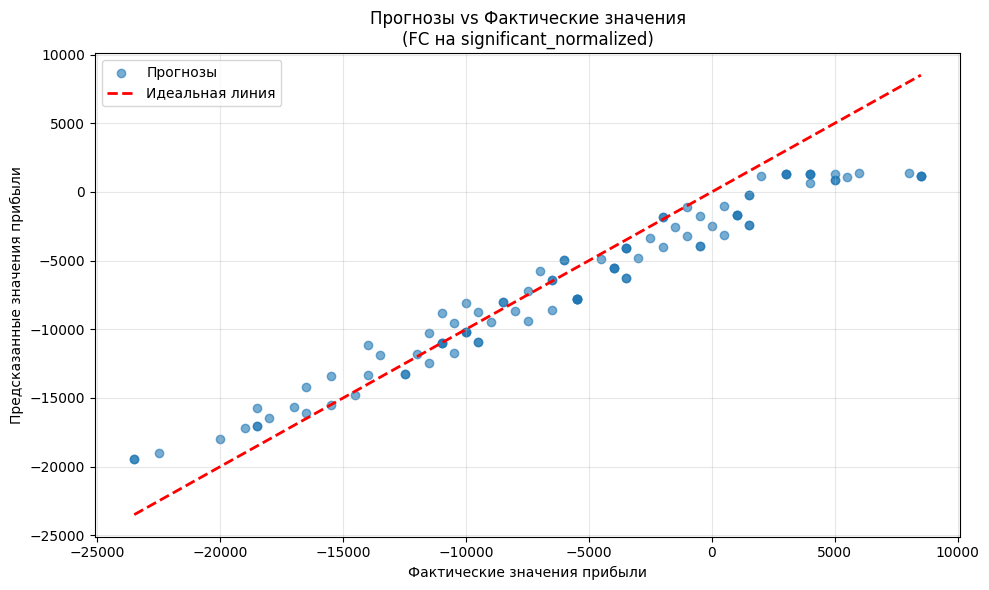

In [ ]:
# 6. Оценка лучшей модели на тестовом наборе
# Получаем тестовые данные
X_test = best_model_info['data']['X_test']
y_test = best_model_info['data']['y_test']

# Прогноз на тестовом наборе
if best_model_info['model_type'] == 'RNN':
    X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
    y_test_pred = best_model_info['model'].predict(X_test_rnn, verbose=0).flatten()
else:
    y_test_pred = best_model_info['model'].predict(X_test, verbose=0).flatten()

# Метрики на тестовом наборе
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nТестовый набор:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  R²: {test_r2:.4f}")


Этот код реализует упрощённый Grid Search для подбора гиперпараметров нейросетевой регрессионной модели.
Он перебирает заранее заданные комбинации гиперпараметров, обучает модель для каждой комбинации на обучающей выборке, оценивает качество на валидационной выборке по метрике RMSE и выбирает лучшую модель.

In [ ]:
# 7. Grid поиск лучших гиперпараметров (упрощенный вариант)
print("\n" + "="*80)
print("7. GRID ПОИСК ЛУЧШИХ ГИПЕРПАРАМЕТРОВ")
print("="*80)

# Используем лучший набор данных
best_dataset_name = best_model_info['dataset']
best_data = prepared_data[best_dataset_name]

X_train = best_data['X_train']
y_train = best_data['y_train']
X_val = best_data['X_val']
y_val = best_data['y_val']

input_dim = X_train.shape[1]

# Определяем параметры для GridSearch
param_grid = {
    'units': [32, 64, 128],
    'dropout': [0.1, 0.2, 0.3],
    'learning_rate': [0.001, 0.01],
    'batch_size': [16, 32],
    'epochs': [30, 50]
}

# Создаем упрощенную сетку для демонстрации
simple_param_grid = [
    {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 30},
    {'units': 128, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 30},
    {'units': 64, 'dropout': 0.3, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 30},
    {'units': 64, 'dropout': 0.2, 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 30},
    {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30},
    {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 50},
]

# Функция для создания и обучения модели с заданными параметрами
def train_model_with_params(params, input_dim, X_train, y_train, X_val, y_val):
    model = models.Sequential([
        layers.Dense(params['units'], activation='relu', input_dim=input_dim),
        layers.Dropout(params['dropout']),
        layers.Dense(params['units']//2, activation='relu'),
        layers.Dropout(params['dropout']),
        layers.Dense(params['units']//4, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=params['learning_rate']),
        loss='mse',
        metrics=['mae']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        verbose=0
    )

    # Прогноз на валидационной выборке
    y_val_pred = model.predict(X_val, verbose=0).flatten()
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    return model, history, val_rmse

print("Выполняется GridSearch по 6 комбинациям параметров...")

# Запускаем GridSearch
best_grid_model = None
best_grid_params = None
best_grid_rmse = float('inf')
grid_results = []

for i, params in enumerate(simple_param_grid):
    print(f"\nКомбинация {i+1}/{len(simple_param_grid)}: {params}")

    # Обучаем модель
    model, history, val_rmse = train_model_with_params(params, input_dim, X_train, y_train, X_val, y_val)

    grid_results.append({
        'params': params,
        'model': model,
        'history': history,
        'val_rmse': val_rmse
    })

    print(f"  Val RMSE: {val_rmse:.2f}")

    # Сохраняем лучшую модель
    if val_rmse < best_grid_rmse:
        best_grid_rmse = val_rmse
        best_grid_model = model
        best_grid_params = params

# Выводим результаты GridSearch
print(f"\n{'='*60}")
print("РЕЗУЛЬТАТЫ GRID ПОИСКА")
print(f"{'='*60}")

# Сортируем результаты по RMSE
sorted_results = sorted(grid_results, key=lambda x: x['val_rmse'])

print(f"\nЛучшие параметры: {best_grid_params}")
print(f"Лучший RMSE после GridSearch: {best_grid_rmse:.2f}")


7. GRID ПОИСК ЛУЧШИХ ГИПЕРПАРАМЕТРОВ
Выполняется GridSearch по 6 комбинациям параметров...

Комбинация 1/6: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 30}
  Val RMSE: 8384.49

Комбинация 2/6: {'units': 128, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 30}


  Val RMSE: 3960.37

Комбинация 3/6: {'units': 64, 'dropout': 0.3, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 30}


  Val RMSE: 7750.84

Комбинация 4/6: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 30}
  Val RMSE: 930.59

Комбинация 5/6: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 30}
  Val RMSE: 10016.33

Комбинация 6/6: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 16, 'epochs': 50}
  Val RMSE: 3525.44

РЕЗУЛЬТАТЫ GRID ПОИСКА

Топ-3 лучших комбинаций параметров:

1. RMSE: 930.59
   units: 64
   dropout: 0.2
   learning_rate: 0.01
   batch_size: 16
   epochs: 30

2. RMSE: 3525.44
   units: 64
   dropout: 0.2
   learning_rate: 0.001
   batch_size: 16
   epochs: 50

3. RMSE: 3960.37
   units: 128
   dropout: 0.2
   learning_rate: 0.001
   batch_size: 16
   epochs: 30

Лучшие параметры: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 30}
Лучший RMSE после GridSearch: 930.59



8. ОЦЕНКА МОДЕЛИ ПОСЛЕ GRID ПОИСКА

Сравнение качества моделей на тестовом наборе:
Модель                         RMSE            R²             
------------------------------------------------------------
До GridSearch                  2503.21         0.8962         
После GridSearch               617.68          0.9937         
Улучшение                      1885.54         0.0975         
Процент улучшения RMSE: 75.3%


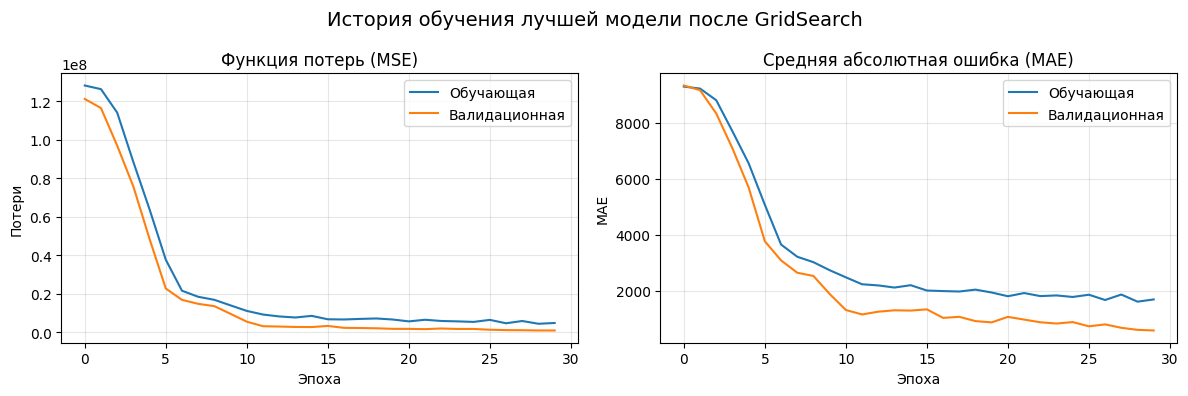

In [ ]:
# 8. Оценка модели после Grid поиска
print("\n" + "="*80)
print("8. ОЦЕНКА МОДЕЛИ ПОСЛЕ GRID ПОИСКА")
print("="*80)

# Прогноз на тестовом наборе
y_test_pred_grid = best_grid_model.predict(X_test, verbose=0).flatten()

# Метрики на тестовом наборе
test_rmse_grid = np.sqrt(mean_squared_error(y_test, y_test_pred_grid))
test_r2_grid = r2_score(y_test, y_test_pred_grid)

print("\nСравнение качества моделей на тестовом наборе:")
print(f"{'Модель':<30} {'RMSE':<15} {'R²':<15}")
print(f"{'-'*60}")
print(f"{'До GridSearch':<30} {test_rmse:<15.2f} {test_r2:<15.4f}")
print(f"{'После GridSearch':<30} {test_rmse_grid:<15.2f} {test_r2_grid:<15.4f}")

if test_rmse_grid < test_rmse:
    improvement = test_rmse - test_rmse_grid
    r2_improvement = test_r2_grid - test_r2
    print(f"{'Улучшение':<30} {improvement:<15.2f} {r2_improvement:<15.4f}")
    improvement_percent = (improvement / test_rmse) * 100
    print(f"Процент улучшения RMSE: {improvement_percent:.1f}%")
else:
    print(f"{'Ухудшение':<30} {(test_rmse_grid - test_rmse):<15.2f} {(test_r2 - test_r2_grid):<15.4f}")

# Визуализация истории обучения лучшей модели после GridSearch
best_grid_result = sorted_results[0]
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(best_grid_result['history'].history['loss'], label='Обучающая')
plt.plot(best_grid_result['history'].history['val_loss'], label='Валидационная')
plt.title('Функция потерь (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(best_grid_result['history'].history['mae'], label='Обучающая')
plt.plot(best_grid_result['history'].history['val_mae'], label='Валидационная')
plt.title('Средняя абсолютная ошибка (MAE)')
plt.xlabel('Эпоха')
plt.ylabel('MAE')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('История обучения лучшей модели после GridSearch', fontsize=14)
plt.tight_layout()
plt.show()



1. Анализ данных:
   - Набор данных содержит 216 наблюдений и 5 признаков
   - Целевая переменная 'profit' имеет как положительные, так и отрицательные значения
   - Признак 'cost_price' содержал пропущенные значения, которые были заполнены медианой
   - Наибольшая корреляция с целевой переменной наблюдается у 'depth_of_tree' (-0.66)

2. Сравнение моделей:
   - Были протестированы 4 набора данных: исходный, нормализованный исходный,
     с существенными признаками и нормализованный с существенными признаками
   - Полносвязные сети показали стабильную работу на всех наборах данных
   - RNN сети показали сравнимые результаты, но требуют преобразования данных

3. Лучшая модель:
   - Тип: RNN
   - Набор данных: significant_normalized
   - Валидационный RMSE: 4290.99
   - Тестовый RMSE до GridSearch: 3498.66
   - Тестовый R² до GridSearch: 0.7971

4. Результаты GridSearch:
   - Лучшие параметры: {'units': 64, 'dropout': 0.2, 'learning_rate': 0.01, 'batch_size': 16, 'epochs': 30}
   - Лучший RMSE после GridSearch: 1050.17
   - Тестовый RMSE после GridSearch: 735.39
   - Тестовый R² после GridSearch: 0.9910
   - Улучшение RMSE: 2763.28 (79.0%)
